## 6.5 Machine Learning Part 2

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Defining a path
path = r'/Users/hectorvargas/Desktop/Career_Foundry/12-2022 Gun Violence Analysis'

In [72]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'gun_violence_script2.csv'))

In [73]:
df.shape

(239677, 12)

In [74]:
df.head()

,Unnamed: 0,state,n_killed,Childs,Teens,Adults,Male,Female,date,year,month,day
0,0,Pennsylvania,0,0.0,0.0,5.0,3.0,1.0,2013-01-01,2013,January,1
1,1,California,1,0.0,0.0,4.0,1.0,0.0,2013-01-01,2013,January,1
2,2,Ohio,1,0.0,0.0,5.0,5.0,0.0,2013-01-01,2013,January,1
3,3,Colorado,4,0.0,0.0,4.0,3.0,1.0,2013-01-05,2013,January,5
4,4,North Carolina,2,0.0,1.0,3.0,2.0,2.0,2013-01-07,2013,January,7


In [75]:
df.isnull().values.any()

True

In [76]:
df = df.fillna(0)

In [77]:
df.isnull().values.any()

False

In [78]:
# Dropping Columns
df.drop(['state','Childs','Teens','date'], axis=1, inplace= True)
df.head()

,Unnamed: 0,n_killed,Adults,Male,Female,year,month,day
0,0,0,5.0,3.0,1.0,2013,January,1
1,1,1,4.0,1.0,0.0,2013,January,1
2,2,1,5.0,5.0,0.0,2013,January,1
3,3,4,4.0,3.0,1.0,2013,January,5
4,4,2,3.0,2.0,2.0,2013,January,7


In [79]:
# Dropping Columns
df.drop(['month'], axis=1, inplace= True)
df.head()

,Unnamed: 0,n_killed,Adults,Male,Female,year,day
0,0,0,5.0,3.0,1.0,2013,1
1,1,1,4.0,1.0,0.0,2013,1
2,2,1,5.0,5.0,0.0,2013,1
3,3,4,4.0,3.0,1.0,2013,5
4,4,2,3.0,2.0,2.0,2013,7


In [81]:
df.shape

(239677, 7)

### 2. The elbow technique

In [82]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [83]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
score

[-1147355076672021.8,
 -286838815367209.9,
 -127490961899377.7,
 -71724644393384.78,
 -45910114879251.83,
 -31880330226534.05,
 -23422749522489.855,
 -17937087885536.484,
 -14202753514844.148]

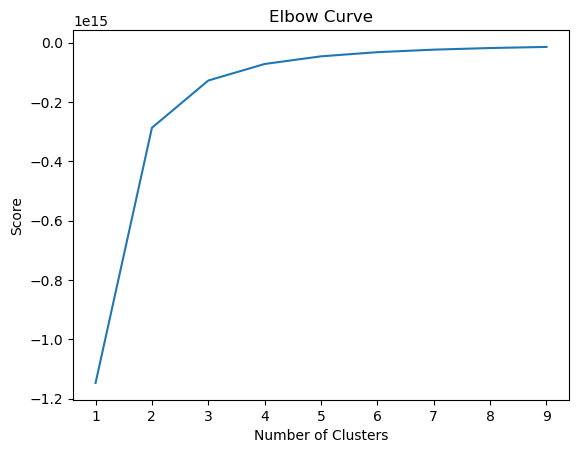

In [84]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I'm getting a value between 2 and 3 for the breaking point of the curve, meaning that I could go for one of those values. I decided to go with 3 clusters; in this case, the optimal count for my clusters is just this one. I have enough data to go for this amount.

### 3. k-means clustering

In [90]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [91]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [92]:
df['clusters'] = kmeans.fit_predict(df)

In [93]:
df2.head()

,n_killed,Adults,Male,Female,year,day,clusters
0,0,5.0,3.0,1.0,2013,1,3
1,1,4.0,1.0,0.0,2013,1,3
2,1,5.0,5.0,0.0,2013,1,3
3,4,4.0,3.0,1.0,2013,5,3
4,2,3.0,2.0,2.0,2013,7,1


In [94]:
df['clusters'].value_counts()

1    80034
2    79872
0    79771
Name: clusters, dtype: int64

In [96]:
df.shape

(239677, 8)

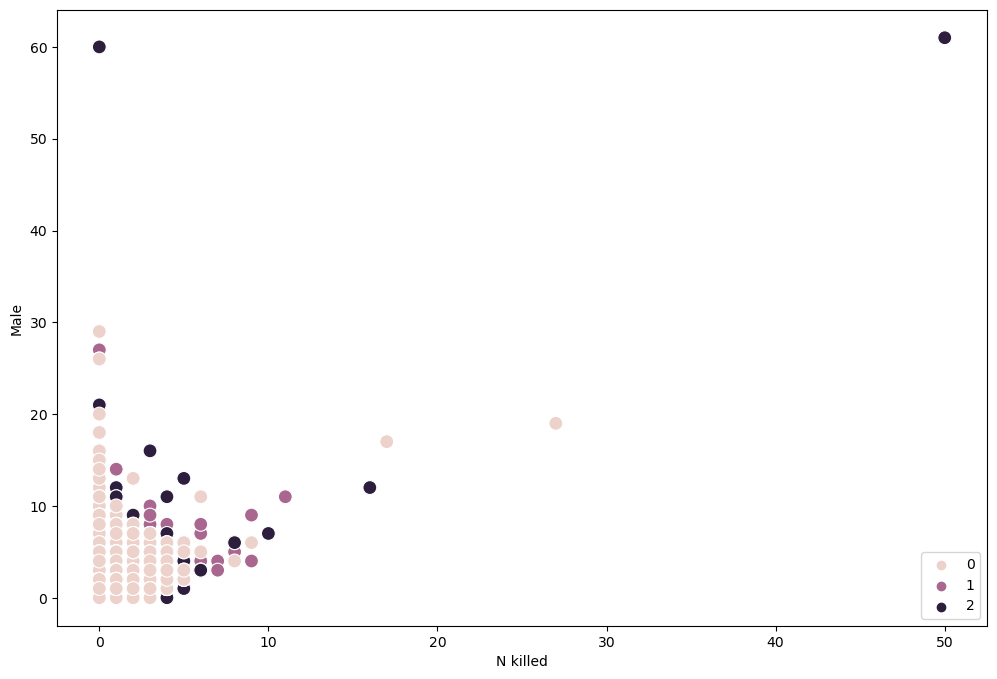

In [100]:
# Plot the clusters for the "Number of killed" and "Male" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['n_killed'], y=df['Male'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('N killed') # Label x-axis.
plt.ylabel('Male') # Label y-axis.
plt.show()

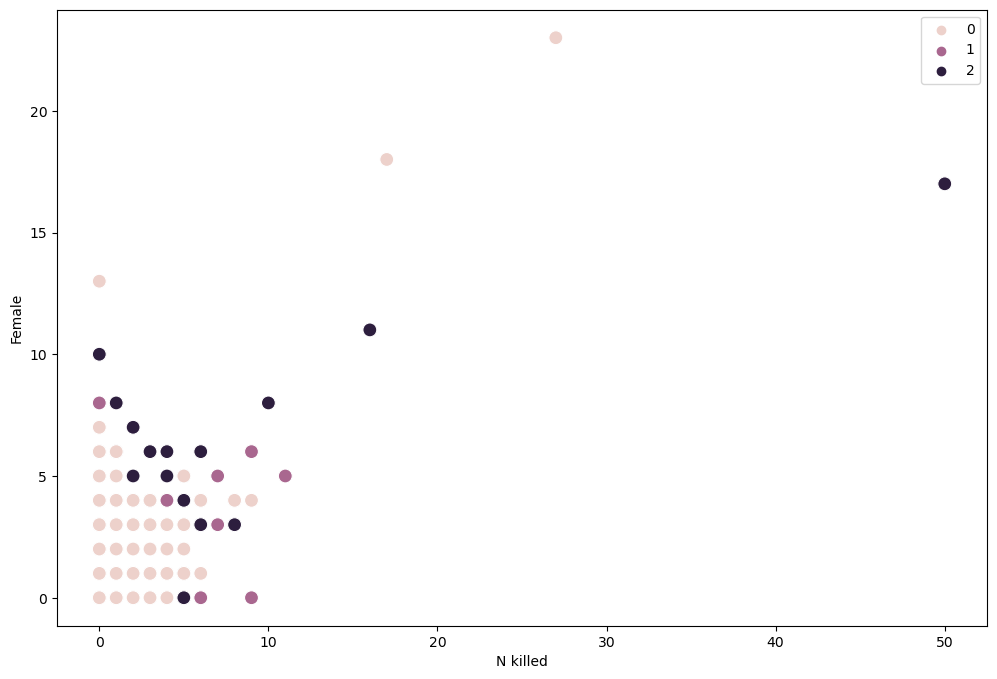

In [101]:
# Plot the clusters for the "Number of Killed" and "Female" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['n_killed'], y=df['Female'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('N killed') 
plt.ylabel('Female') 
plt.show()

#### The two graphs do not make sense or give a great insight into the relationship between the number of deaths and deaths by the female and male gender. This suggests that the number of fatalities in Males moves in the same range between 0 and 10; this could be because of how I'm counting the deaths per day.


In [105]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [104]:
df.groupby('cluster').agg({'n_killed':['mean', 'median'], 
                         'Male':['mean', 'median'], 
                         'Female':['mean', 'median'],
                          'Adults':['mean', 'median']})

n_killed             Male           Female           Adults  \
                 mean median      mean median      mean median      mean   
cluster                                                                    
dark purple  0.254870    0.0  1.290089    1.0  0.181465    0.0  1.254344   
pink         0.253751    0.0  1.225320    1.0  0.160798    0.0  1.185205   
purple       0.248257    0.0  1.353225    1.0  0.198053    0.0  1.395694   

                    
            median  
cluster             
dark purple    1.0  
pink           1.0  
purple         1.0

#### As explained earlier, the data does not suggest a great insight into the relationship between the columns. The results look like this, probably due to the number of zeros o no values the data set has.